## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.DataFrame(data = ["台灣","中國","香港","澳門"],
                    columns=['Countries'])
data['Population'] = np.random.randint(low = 20,
                                       high= 1000,
                                       size= 4)
data.head()

,Countries,Population
0,台灣,243
1,中國,632
2,香港,22
3,澳門,897


In [5]:
data.loc[data['Population'].idxmax(),:]

Countries      澳門
Population    897
Name: 3, dtype: object

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [6]:
import requests

In [7]:
# 把連結填入
url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
response = requests.get(url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:200]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51'

In [8]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0:5]

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

## 將 txt 轉成 pandas dataframe

In [78]:
import pandas as pd
arrange_data = [i.split('\t') for i in data]
    
df = pd.DataFrame(arrange_data, columns=['file_name', 'url'])
df.head(10)

,file_name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


In [98]:
url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
df = pd.read_csv(url, sep = '\t',names=['file_name','url'])
df.head(10)                  

,file_name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [10]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

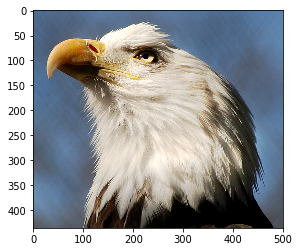

In [11]:
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, "web"]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [13]:
df.loc[:,'web'].head()

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
Name: web, dtype: object

In [14]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for web in url_list:
        img = None
        try:
            response = requests.get(web)
            img = Image.open(BytesIO(response.content))
        except:
            print('No response: ', web) #有錯誤時顯示網址
    
        if img is not None:
            img_list.append(img)
            
    return img_list

No response:  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


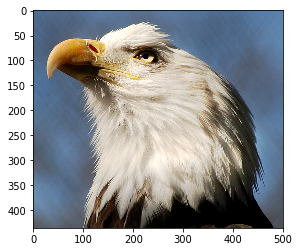

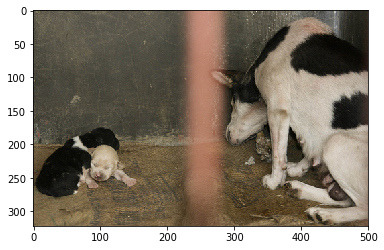

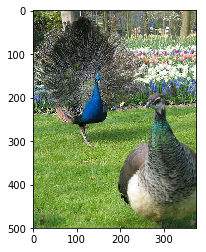

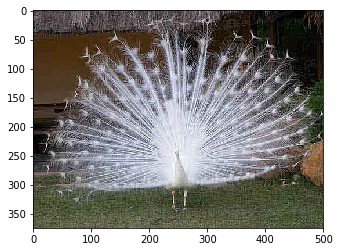

In [15]:
result = img2arr_fromURLs(df[0:5]["web"].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

In [120]:
# 成功讀取圖片數量
img_count = 0 
# 第幾個迴圈
i = 1
# 成功讀取5張圖片才結束迴圈
while len(img_list) < 5: 
    img = None
    # 嘗試存取圖片
    try:
        img = Image.open(BytesIO(requests.get(df.loc[i,'url']).content))
        # 成功存取圖片時，輸出圖片並將count數量+1
        if (img != None):
            img_count += 1
            plt.imshow(img)
        # 否則回傳失敗的網址
        else:
            print('No response: ', df.loc[i,'url'])
    # 該迴圈執行完成後，將i+1，並進行第二個迴圈
    img_count = img_count + 1


SyntaxError: invalid syntax (<ipython-input-120-310ceff40d29>, line 19)

In [114]:
img

In [76]:
img_list = [] 
i = 0 # 第幾個迴圈
while len(img_list) < 5:
    link = df.loc[i,'web']
    try:
        response = requests.get(link)
        img_list.append(Image.open(BytesIO(response.content)))
    except:
        print('Image Index {} doesn\'t exist'.format(j))
    else:
        i += 1
    finally:
        j += 1
    return img_list

SyntaxError: 'return' outside function (<ipython-input-76-02de1a98bf52>, line 12)

In [26]:
df.loc[0,'web']

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [27]:
requests.get(df.loc[0,'web'])

<Response [200]>

In [81]:
img = Image.open(BytesIO(requests.get(df.loc[0,'url']).content))

In [57]:
img = Image.open(BytesIO(requests.get(df.loc[0,'web']).content))

In [103]:
img_list.append(img)

In [104]:
len(img_list)

2

In [84]:
img_list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x436 at 0x28BE94E4518>]

TypeError: int() argument must be a string, a bytes-like object or a number, not 'JpegImageFile'

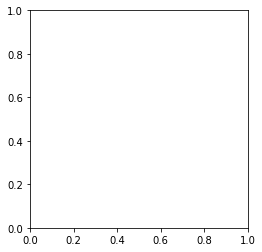

In [105]:
plt.imshow(img_list)